# distance viz preprocessing and stuff

### utils

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopy.distance

In [6]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    calculate the distance in miles 
    between lat and lon
    """
    return geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).miles

### preprocessing

In [48]:
loc = pd.read_csv('data/locations.csv').drop(columns='address')
dst = pd.read_csv('data/distances.csv')

dst = dst.merge(loc, how='left', left_on='imo', right_on='location').drop(columns='location')
dst = dst.rename(columns={
    'lat':'imo_lat',
    'lon':'imo_lon'
})
dst = dst.merge(loc, how='left', left_on='jwu', right_on='location').drop(columns='location')
dst = dst.rename(columns={
    'lat':'jwu_lat',
    'lon':'jwu_lon'
})
dst.head()

,date,imo,jwu,description,year,month,day,imo_lat,imo_lon,jwu_lat,jwu_lon
0,"Fri, Jul 29, 22",The Bluffs,The Bluffs,Jyalu visits Imo in Carlsbad,2022,7,29,33.178038,-117.322188,33.178038,-117.322188
1,"Thu, Jul 28, 22",The Bluffs,Sharon,the sponless time,2022,7,28,33.178038,-117.322188,42.107550,-71.153158
2,"Wed, Jul 27, 22",The Bluffs,Sharon,the sponless time,2022,7,27,33.178038,-117.322188,42.107550,-71.153158
3,"Tue, Jul 26, 22",The Bluffs,Sharon,the sponless time,2022,7,26,33.178038,-117.322188,42.107550,-71.153158
4,"Mon, Jul 25, 22",The Bluffs,Sharon,the sponless time,2022,7,25,33.178038,-117.322188,42.107550,-71.153158


In [49]:
dst['distance'] = dst.apply(lambda row: calculate_distance(row.imo_lat, row.imo_lon, row.jwu_lat, row.jwu_lon), axis=1)

In [50]:
dst.head()

,date,imo,jwu,description,year,month,day,imo_lat,imo_lon,jwu_lat,jwu_lon,distance
0,"Fri, Jul 29, 22",The Bluffs,The Bluffs,Jyalu visits Imo in Carlsbad,2022,7,29,33.178038,-117.322188,33.178038,-117.322188,0.000000
1,"Thu, Jul 28, 22",The Bluffs,Sharon,the sponless time,2022,7,28,33.178038,-117.322188,42.107550,-71.153158,2572.899779
2,"Wed, Jul 27, 22",The Bluffs,Sharon,the sponless time,2022,7,27,33.178038,-117.322188,42.107550,-71.153158,2572.899779
3,"Tue, Jul 26, 22",The Bluffs,Sharon,the sponless time,2022,7,26,33.178038,-117.322188,42.107550,-71.153158,2572.899779
4,"Mon, Jul 25, 22",The Bluffs,Sharon,the sponless time,2022,7,25,33.178038,-117.322188,42.107550,-71.153158,2572.899779


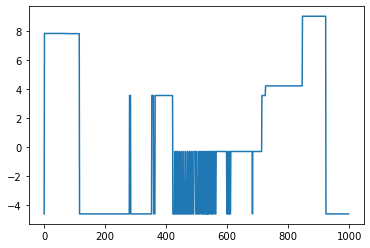

In [60]:
plt.plot(np.log(dst.distance+.01))